OpenCV Version : 4.9.0 


C:\Users\Daniel Segura\AppData\Local\Temp\ipykernel_23168\3130351642.py:42: RuntimeWarning: overflow encountered in scalar subtract
  color_diff = np.sqrt(np.sum((img[current_pixel[1], current_pixel[0]] - seed_color) ** 2))


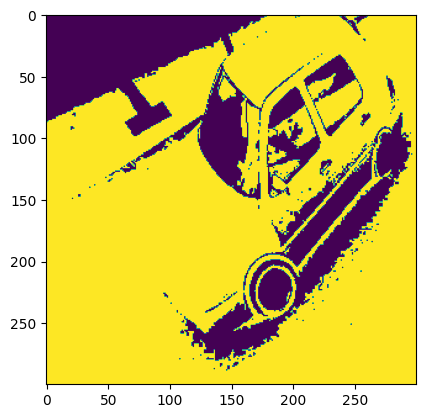

In [11]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

from scipy import signal
from scipy import misc
from scipy.ndimage import label

bicicleta = cv2.imread('Imagenes/Bicicleta.jpg',0)
bus = cv2.imread('Imagenes/Bus.jpg')
carro = cv2.imread('Imagenes/Carro.jpg',0)
pare = cv2.imread("Imagenes/Pare.jpg",0)
planta = cv2.imread('Imagenes/Planta.jpg',0)

def region_growing(img, seed, threshold):
    # Crear una máscara para la región segmentada
    mask = np.zeros_like(img, dtype=np.uint8)
    h, w = img.shape[:2]

    # Obtener el color de la semilla
    seed_color = img[seed[1], seed[0]]

    # Lista de píxeles a revisar
    pixel_list = [seed]

    # Definir la vecindad de 8-píxeles
    neighbors = [(x, y) for x in range(-1, 2) for y in range(-1, 2) if x != 0 or y != 0]

    while len(pixel_list) > 0:
        # Tomar el primer píxel de la lista
        current_pixel = pixel_list[0]
        pixel_list = pixel_list[1:]

        # Verificar si el píxel está dentro de la imagen
        if 0 <= current_pixel[0] < w and 0 <= current_pixel[1] < h:
            # Verificar si el píxel ya está marcado
            if mask[current_pixel[1], current_pixel[0]] == 0:
                # Calcular la diferencia de color entre el píxel actual y la semilla
                color_diff = np.sqrt(np.sum((img[current_pixel[1], current_pixel[0]] - seed_color) ** 2))

                # Si la diferencia de color está dentro del umbral, agregar el píxel a la región
                if color_diff < threshold:
                    mask[current_pixel[1], current_pixel[0]] = 255

                    # Agregar vecinos a la lista de píxeles a revisar
                    for neighbor in neighbors:
                        new_pixel = (current_pixel[0] + neighbor[0], current_pixel[1] + neighbor[1])
                        if 0 <= new_pixel[0] < w and 0 <= new_pixel[1] < h:
                            pixel_list.append(new_pixel)

    return mask

# Cargar la imagen
image = carro

# Convertir a escala de grises


# Aplicar la segmentación por región
seed_point = (100, 100)  # Punto inicial de la semilla
threshold_value = 200      # Umbral de similitud

segmented_region = region_growing(image, seed_point, threshold_value)

# Mostrar la imagen original y la región segmentada
plt.imshow( image)
plt.imshow(segmented_region)
